## DTSC 2301 Spring 2025 Homework #3

Turn in your assignment via Gradescope

Due 2/1/25, 5:00pm

For this assignment you may *not* use any generative AI and you may only use python commands and code we used in class.

#### Question 1

For this questions, we will analyze some data regarding players from the National Hockey League for the 2019 season and the 2020 season.  
Here's the link to that data 
[<https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/NHLShootingPct.csv>].  
Note that the data is only for even-strength situations when each team has the same number of skaters on the ice.
  
From these data run a regression predicting the number of shots a player got in 2020, *Shots2020*, from the number of shots that they 
took in 2019, *Shots2019*.  Find the $r$, $r^2$ and the $RMSE$.  Interpret each of those.


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as MTH
 
import scipy.stats as st
import statsmodels.api as sm 
import pylab as py 

# here are some of the tools we will use for our analyses
from sklearn.linear_model import LinearRegression
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

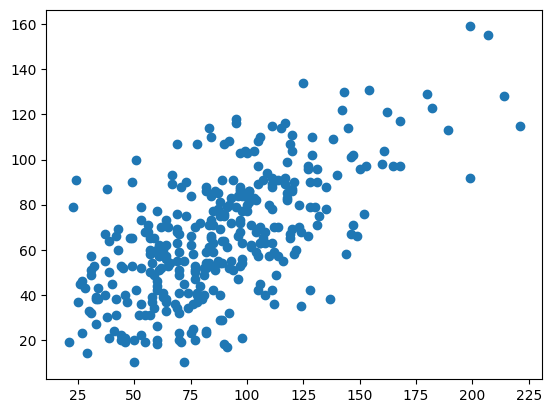

In [70]:
shots = pd.read_csv('NHLShootingPct.csv')
plt.scatter(shots['Shots2019'],shots['Shots2020'])

In [54]:
shots['Shots2019'] = shots['Shots2019'].astype(int)
shots['Shots2020'] = shots['Shots2020'].astype(int)   
x = shots['Shots2019']
y = shots['Shots2020']
x2 = sm.add_constant(x)
model = LinearRegression()
model.fit(x2,y)
r2 = sm.OLS(y,x2).fit()
y_hat = model.predict(x2)
r2 = r2_score(y_true = y, y_pred = y_hat)
rmse = root_mean_squared_error(y,y_hat)
print(f'Coefficeints are {model.coef_}\nintercept is {model.intercept_}\n R and r Squared are {MTH.sqrt(r2)} / {r2}\n RMSE is {rmse}')



Coefficeints are [0.         0.48363528]
intercept is 23.229197091764476
 R and r Squared are 0.6328298380606218 / 0.4004736039398328
 RMSE is 21.21281626393402


#### Question 1 Answers
    The R Value tells us that there is a moderate correlation
    The R Squared value tells us that about 40% of the error can be explained by the model.
    The RMSE tells us about how much each value is off, and in this case the value of about 21 is telling us each predicted value is on average 21 units off.

In [72]:
print(shots.head())
shots2020 = shots['Shots2020']

        ID            Player Pos  Goals2019  Shots2019    Sh2019  Goals2020  \
0  8479318   Auston Matthews   C         31        199  0.155779         28   
1  8478402    Connor McDavid   C         21        143  0.146853         19   
2  8478420    Mikko Rantanen   R          9         69  0.130435         18   
3  8478493  Joel Eriksson Ek   C          7         92  0.076087         17   
4  8478483   Mitchell Marner   R          7         97  0.072165         17   

   Shots2020    Sh2020  id  
0        159  0.176101   1  
1        130  0.146154   2  
2        107  0.168224   3  
3        108  0.157407   4  
4        103  0.165049   5  


#### Question 2
For this questions, use the data from Question 1.  Create a 95% confidence interval for the correlation in Question 1 by bootstrapping the rows of the data.  That is, your bootstrapping should select rows rather than individual measurements.  Here is some *updated* code for the bootstrap loop that will be helpful.


In [ ]:
n_penguins=len(shots2020)
n_reps = 5000
boot_means = []
for i in range(n_reps):
    bms = np.random.choice(shots2020.tolist(), n_penguins),
    avg = np.mean(bms),
    boot_means.append(avg)


print("Average of the bootstrapped means is", np.mean(boot_means))
print("Standard deviation of the bootstrapped means is", np.std(boot_means))

st.t.interval(confidence=0.95, 
              df=len(shots)-1, 
              loc=np.mean(boot_means),  
              scale=st.sem(boot_means)) 

Average of the bootstrapped means is 65.88105129682997
Standard deviation of the bootstrapped means is 1.472870442375732


(array([65.84007876]), array([65.92202384]))

#### Question 3
Again using the data from Question 1, create and interpret a $90\%$ confidence interval for the slope of the regression line for using shooting percentage in 2019, *Sh2019*, to predict shooting percentage in 2020, *Sh2020*, in the context of these data.  Shooting percentage is the percentage of shots that are goals, i.e the ratio of goals to (goals + shots).  

In [ ]:
x = shots['Sh2019']
y = shots['Sh2020']
x2 = sm.add_constant(x)
shmodel = LinearRegression()
shmodel.fit(x2,y)
ans = shmodel.predict(x2)
shmean = np.mean(ans)

st.t.interval(confidence=.90,df=len(ans)-1,loc=np.mean(ans),scale=st.sem(ans))

(np.float64(0.10128141004476421), np.float64(0.1028944796267055))

#### Question 4
You want to choose the best feature to predict *Goals2020* from among *Goals2019*, *Sh2019*, and *Shots2019*.  How would you decide which of these is the best predictor of *Goals2020*?  Explain clearly why you would choose that methodology

           Goals2019    Sh2019  Shots2019  Goals2020
Goals2019   1.000000  0.656741   0.768397   0.474410
Sh2019      0.656741  1.000000   0.085006   0.197568
Shots2019   0.768397  0.085006   1.000000   0.458895
Goals2020   0.474410  0.197568   0.458895   1.000000


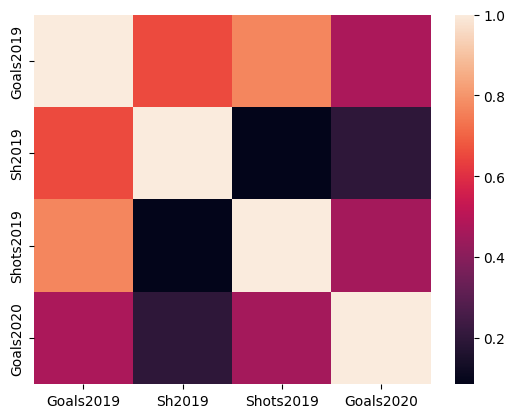

In [123]:
htmap = shots[['Goals2019','Sh2019','Shots2019','Goals2020']]
htcorr = htmap.corr()
sns.heatmap(htcorr)
print(htcorr)

To find the best features I created a correlation heatmap to see which features are the most correlated with Goals2020, and found that 2019 goals and shooting average are the best features to predict goals in 2020


#### Question 5
Suppose we want to use a linear regression with *Sh2019* as the feature and  *Goals2020* as the target.  Evaluate whether or not a linear regression model is appropriate for that task.  Explain clearly why or why not.

[ 0.         22.35939033]


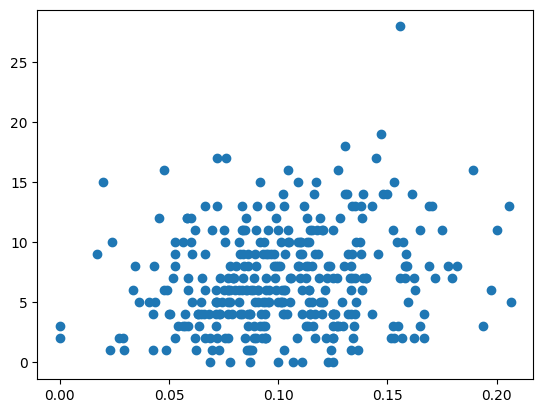

: 

In [151]:
x = shots['Sh2019']
y = shots['Goals2020']
x2 = sm.add_constant(x)
pred = LinearRegression()
pred.fit(x2,y)
yhat = pred.predict(x2)
coef = pred.coef_
print(coef)
plt.scatter(shots['Sh2019'],shots['Goals2020'])


Using a Linear Regression Model for this comparison may not be the best solution. When simply putting the data on a scatter plot you can see there is a weak relationship and undiscernible if it is positve or negative. As well as the heatmap from above showing very low correlation between this x and y shows that this may not be the best model.

#### Question 6

**Be sure that your response is fully readable in your submission**

Sports executives use predictive modeling to maximize success of the team with minimal investment. Given the transparency and abundance of performance data, write a short 80-120 word paragraph explaining how bias can be introduced in sports models, and how introducing bias can affect conclusions? 

Bias can be built into a model wether you realize it or not, every model is built by a person who can subconsiously make the model show you what you want to see. A small example could be the modeler could live in a sunny or warm area and builds his model for this environemnt and ignore players from a wet or cold region who could perform worse than expected. Wether on purpose or not the smallest changes, depending on how correlated each independent variable is, can cause large swings in how the model thinks about the relationships between each variable.

#### Question 7

**Be sure that your response is fully readable in your submission**

What strategies can be employed to mitigate the biases you discussed in Question 6?"

A strategy i think that could be employed is having many differnt people who are all just as skilled create diverse teams so many different minds and idea sets can look over all the work and point out things others cant see, another solution is keeping everything open sourced so anyone can see whats going on under the hood.